In [2]:
pip install WordCloud

  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df = pd.read_csv("../data/processed/reviews_processed.csv")
df.head()

,app_name,review_text,rating,review_date,sentiment,clean_text,word_count,review_month
0,Amazon Shopping,nice app,5,2025-11-24 18:36:34,1,nice app,2,2025-11
1,Amazon Shopping,never use this app all the agents are scammer ...,1,2025-11-24 18:36:18,0,never use app agent scammer ever face problem ...,13,2025-11
2,Amazon Shopping,Worst it doesn't work at crt time,1,2025-11-24 18:33:12,0,worst work crt time,4,2025-11
3,Amazon Shopping,wow,5,2025-11-24 18:32:44,1,wow,1,2025-11
4,Amazon Shopping,I hate you amazon,1,2025-11-24 18:21:52,0,hate amazon,2,2025-11


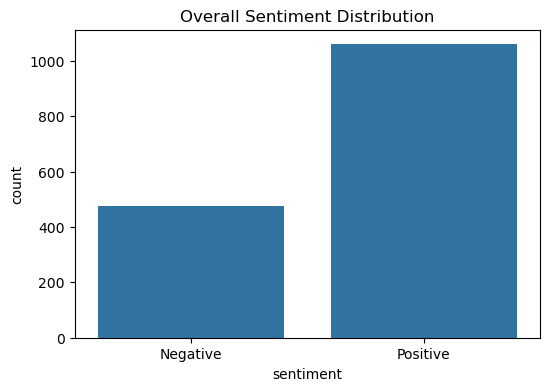

sentiment
1    69.010417
0    30.989583
Name: proportion, dtype: float64

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df)
plt.xticks([0,1], ["Negative","Positive"])
plt.title("Overall Sentiment Distribution")
plt.show()

df['sentiment'].value_counts(normalize=True)*100

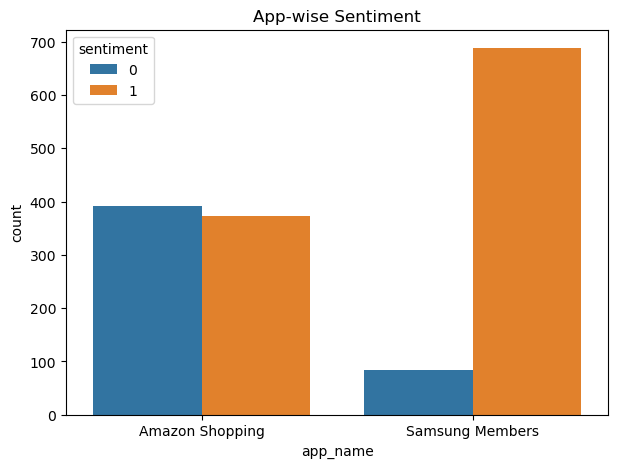

In [5]:
plt.figure(figsize=(7,5))
sns.countplot(x="app_name", hue="sentiment", data=df)
plt.title("App-wise Sentiment")
plt.show()

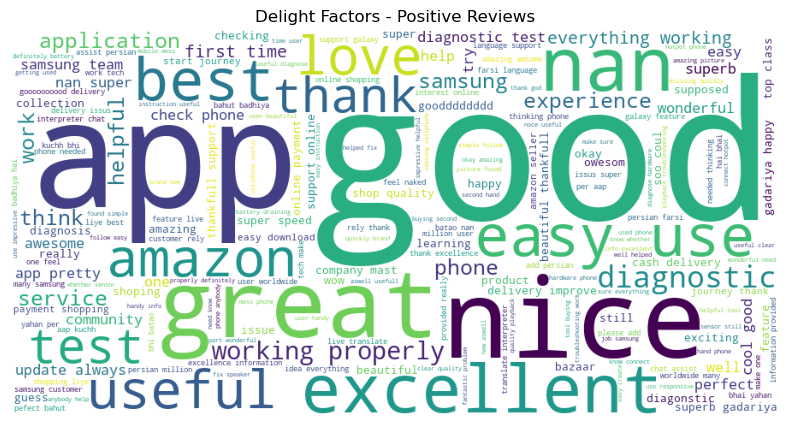

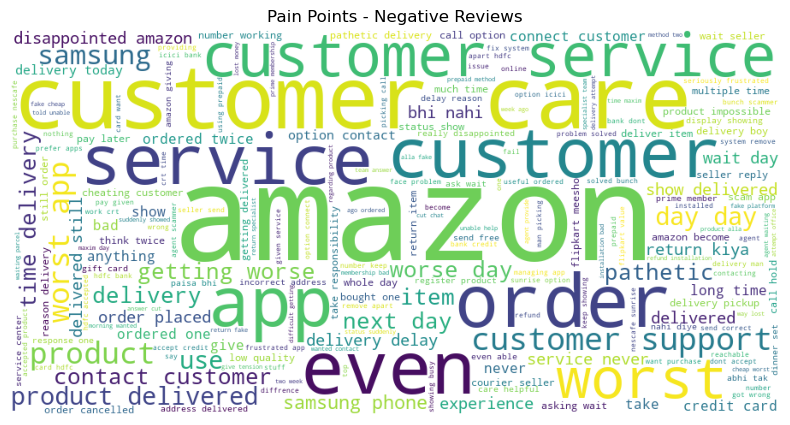

In [9]:
df["clean_text"] = df["clean_text"].astype(str)

pos_text = " ".join(df[df.sentiment == 1].clean_text.fillna(""))
neg_text = " ".join(df[df.sentiment == 0].clean_text.fillna(""))

wc_pos = WordCloud(width=900, height=450, background_color="white").generate(pos_text)
wc_neg = WordCloud(width=900, height=450, background_color="white").generate(neg_text)

plt.figure(figsize=(12,5))
plt.imshow(wc_pos)
plt.axis("off")
plt.title("Delight Factors - Positive Reviews")
plt.show()

plt.figure(figsize=(12,5))
plt.imshow(wc_neg)
plt.axis("off")
plt.title("Pain Points - Negative Reviews")
plt.show()


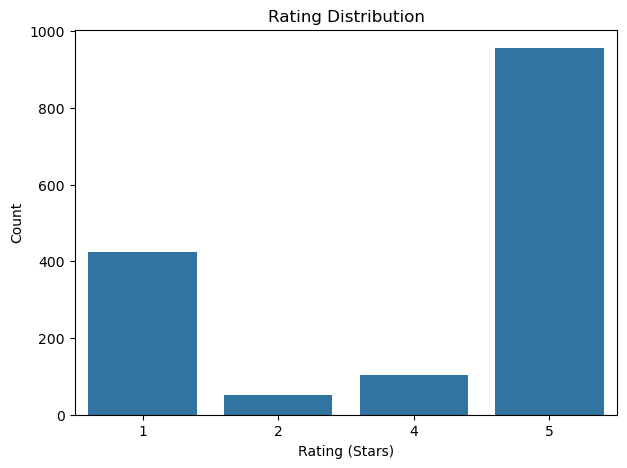

In [13]:
rating_trend = df.groupby("rating").size().reset_index(name="count")

plt.figure(figsize=(7,5))
sns.barplot(data=rating_trend, x="rating", y="count")
plt.title("Rating Distribution")
plt.xlabel("Rating (Stars)")
plt.ylabel("Count")
plt.show()

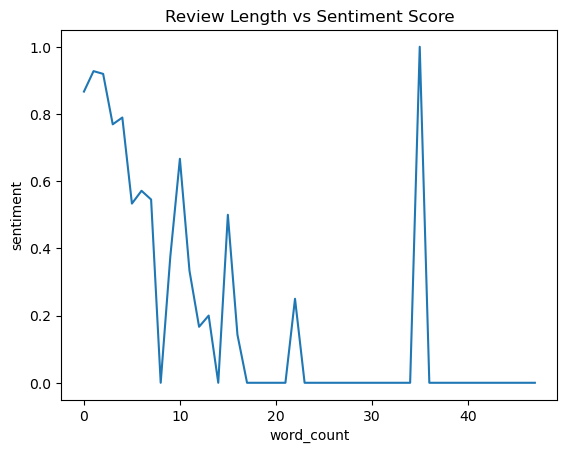

In [14]:
wc_trend = (
    df.groupby("word_count")["sentiment"]
    .mean()
    .reset_index()
)

sns.lineplot(data=wc_trend, x="word_count", y="sentiment")
plt.title("Review Length vs Sentiment Score")
plt.show()

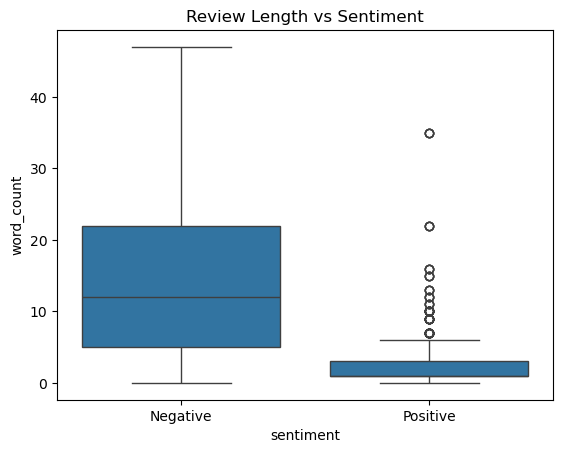

In [11]:
sns.boxplot(x="sentiment", y="word_count", data=df)
plt.xticks([0,1], ["Negative","Positive"])
plt.title("Review Length vs Sentiment")
plt.show()

In [12]:
from collections import Counter

neg_words = " ".join(df[df.sentiment==0].clean_text).split()
common_neg = Counter(neg_words).most_common(20)

pd.DataFrame(common_neg, columns=["Keyword", "Count"])

,Keyword,Count
0,amazon,228
1,customer,196
2,service,164
3,app,156
4,product,148
5,delivery,136
6,day,116
7,order,100
8,delivered,96
9,worst,92
